<a href="https://colab.research.google.com/github/SidSolanki28/Absenteeism-at-Work/blob/master/data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
# important packages
	
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# To display all rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
### Importing content from drive ###

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Dataset

In [4]:
raw_df = pd.read_csv("/content/drive/My Drive/Project/Absenteeism/Absenteeism_at_work.csv", sep = ';')			# to import .csv file

In [5]:
df = raw_df.copy()			# copy of initial dataset

# Data Inspection

In [6]:
df.shape

(700, 21)

In [7]:
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


In [8]:
df.tail(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
690,23,0,5,4,3,378,49,11,36,237.656,99,1,1,2,0,1,4,65,174,21,0
691,17,16,5,6,3,179,22,17,40,237.656,99,0,2,2,0,1,0,63,170,22,1
692,14,10,5,2,3,155,12,14,34,237.656,99,0,1,2,1,0,0,95,196,25,48
693,25,10,5,2,3,235,16,8,32,237.656,99,0,3,0,0,0,0,75,178,25,8
694,15,22,5,4,3,291,31,12,40,237.656,99,0,1,1,1,0,1,73,171,25,8
695,17,10,5,4,3,179,22,17,40,237.656,99,0,2,2,0,1,0,63,170,22,8
696,28,6,5,4,3,225,26,9,28,237.656,99,0,1,1,0,0,2,69,169,24,3
697,18,10,5,5,3,330,16,4,28,237.656,99,0,2,0,0,0,0,84,182,25,8
698,25,23,5,5,3,235,16,8,32,237.656,99,0,3,0,0,0,0,75,178,25,2
699,15,28,5,5,3,291,31,12,40,237.656,99,0,1,1,1,0,1,73,171,25,2


### Concise Summary of Dataset

In [9]:
# for concise summary of dataset
# to check category/continuous/numerical columns
# to check null values in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               700 non-null    int64  
 1   Reason for absence               700 non-null    int64  
 2   Month of absence                 700 non-null    int64  
 3   Day of the week                  700 non-null    int64  
 4   Seasons                          700 non-null    int64  
 5   Transportation expense           700 non-null    int64  
 6   Distance from Residence to Work  700 non-null    int64  
 7   Service time                     700 non-null    int64  
 8   Age                              700 non-null    int64  
 9   Work load Average/day            700 non-null    float64
 10  Hit target                       700 non-null    int64  
 11  Disciplinary failure             700 non-null    int64  
 12  Education             

### Statistical Analysis

In [10]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,6.36000,3.908571,2.574286,222.347143,29.892857,12.658571,36.417143,271.801774,94.537143,0.054286,1.282857,1.021429,0.575714,0.071429,0.687143,79.140000,172.038571,26.737143,6.761429
std,11.028144,8.356292,3.50501,1.420345,1.111223,66.312960,14.804446,4.326020,6.379083,40.021804,3.851320,0.226743,0.668090,1.112215,0.494588,0.257724,1.166095,12.830594,6.018802,4.254701,12.670082
min,1.000000,0.000000,1.00000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.00000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,241.476000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.00000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,10.00000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.00000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# Data Pre-processing and EDA

### NULL & Missing values

In [11]:
df1 = df.copy()

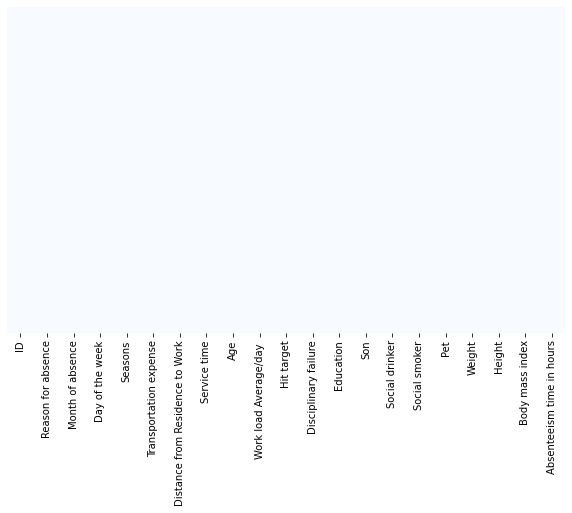

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )
plt.show()

There is no missing values in dataeset. Let's confirm by checking their values.

In [13]:
df1.isnull().sum()			# to get total values in column

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Bam! There is no missing values in dataset

### Numerical Analysis

Let's check numerical analysis of all variables at once.

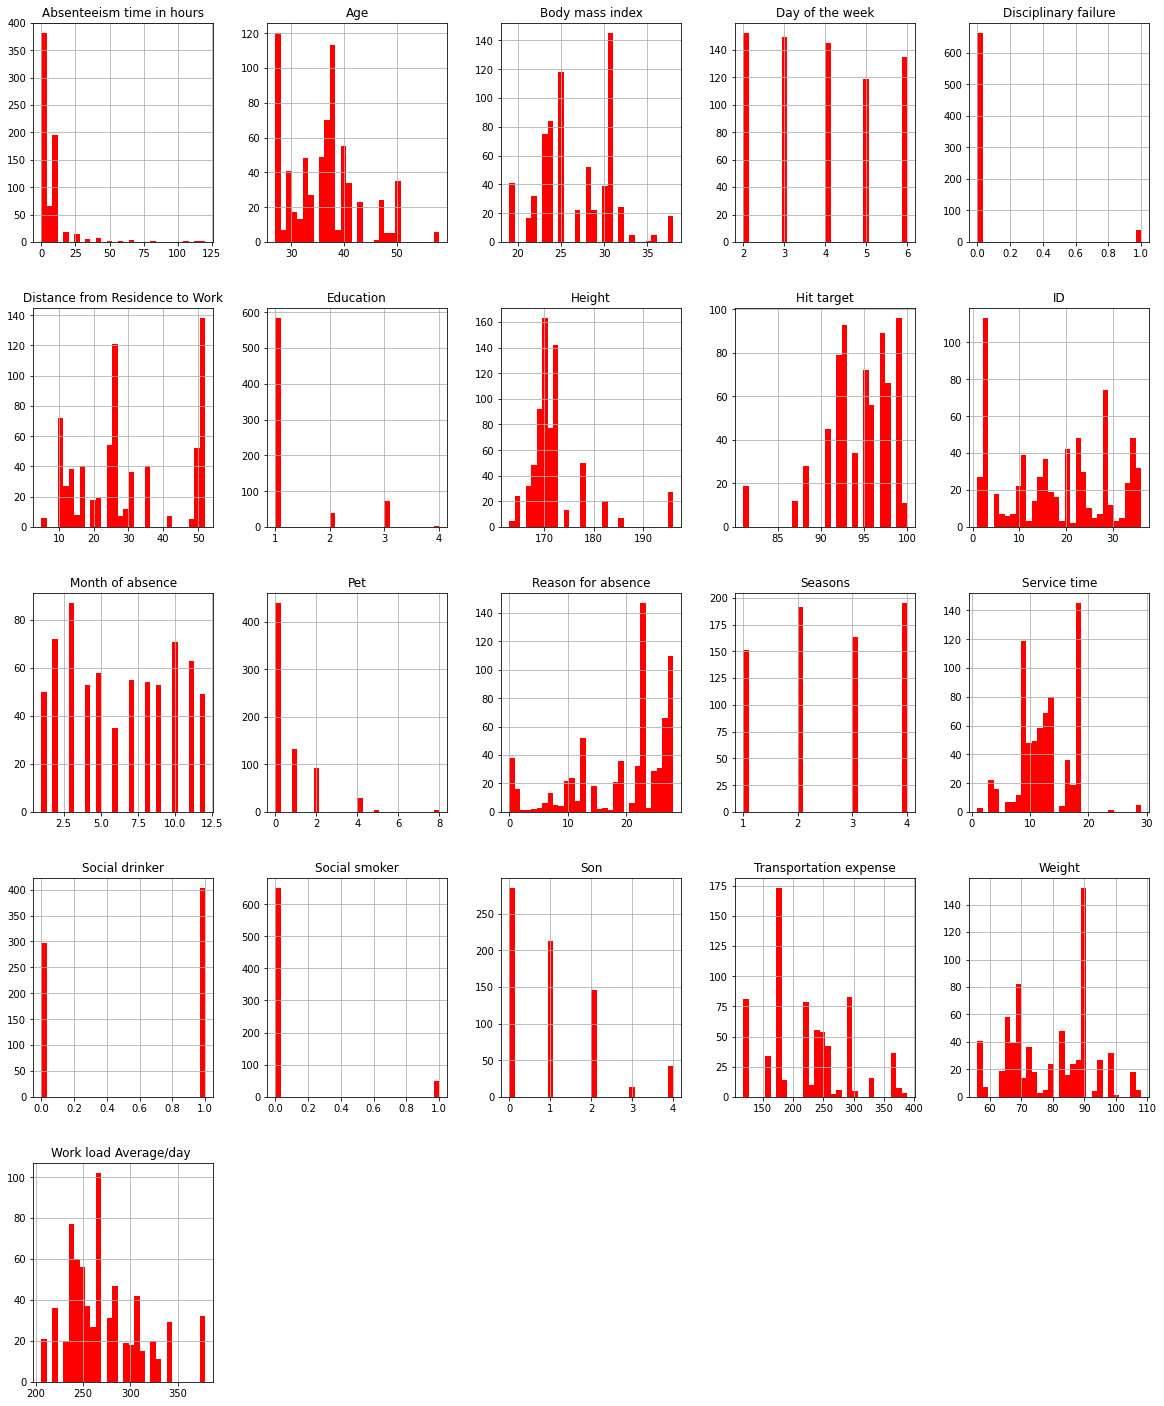

In [14]:
# to check all variables at once

df1.hist( bins = 30, figsize = (20,25), color = 'r')
plt.show()

### Correlations

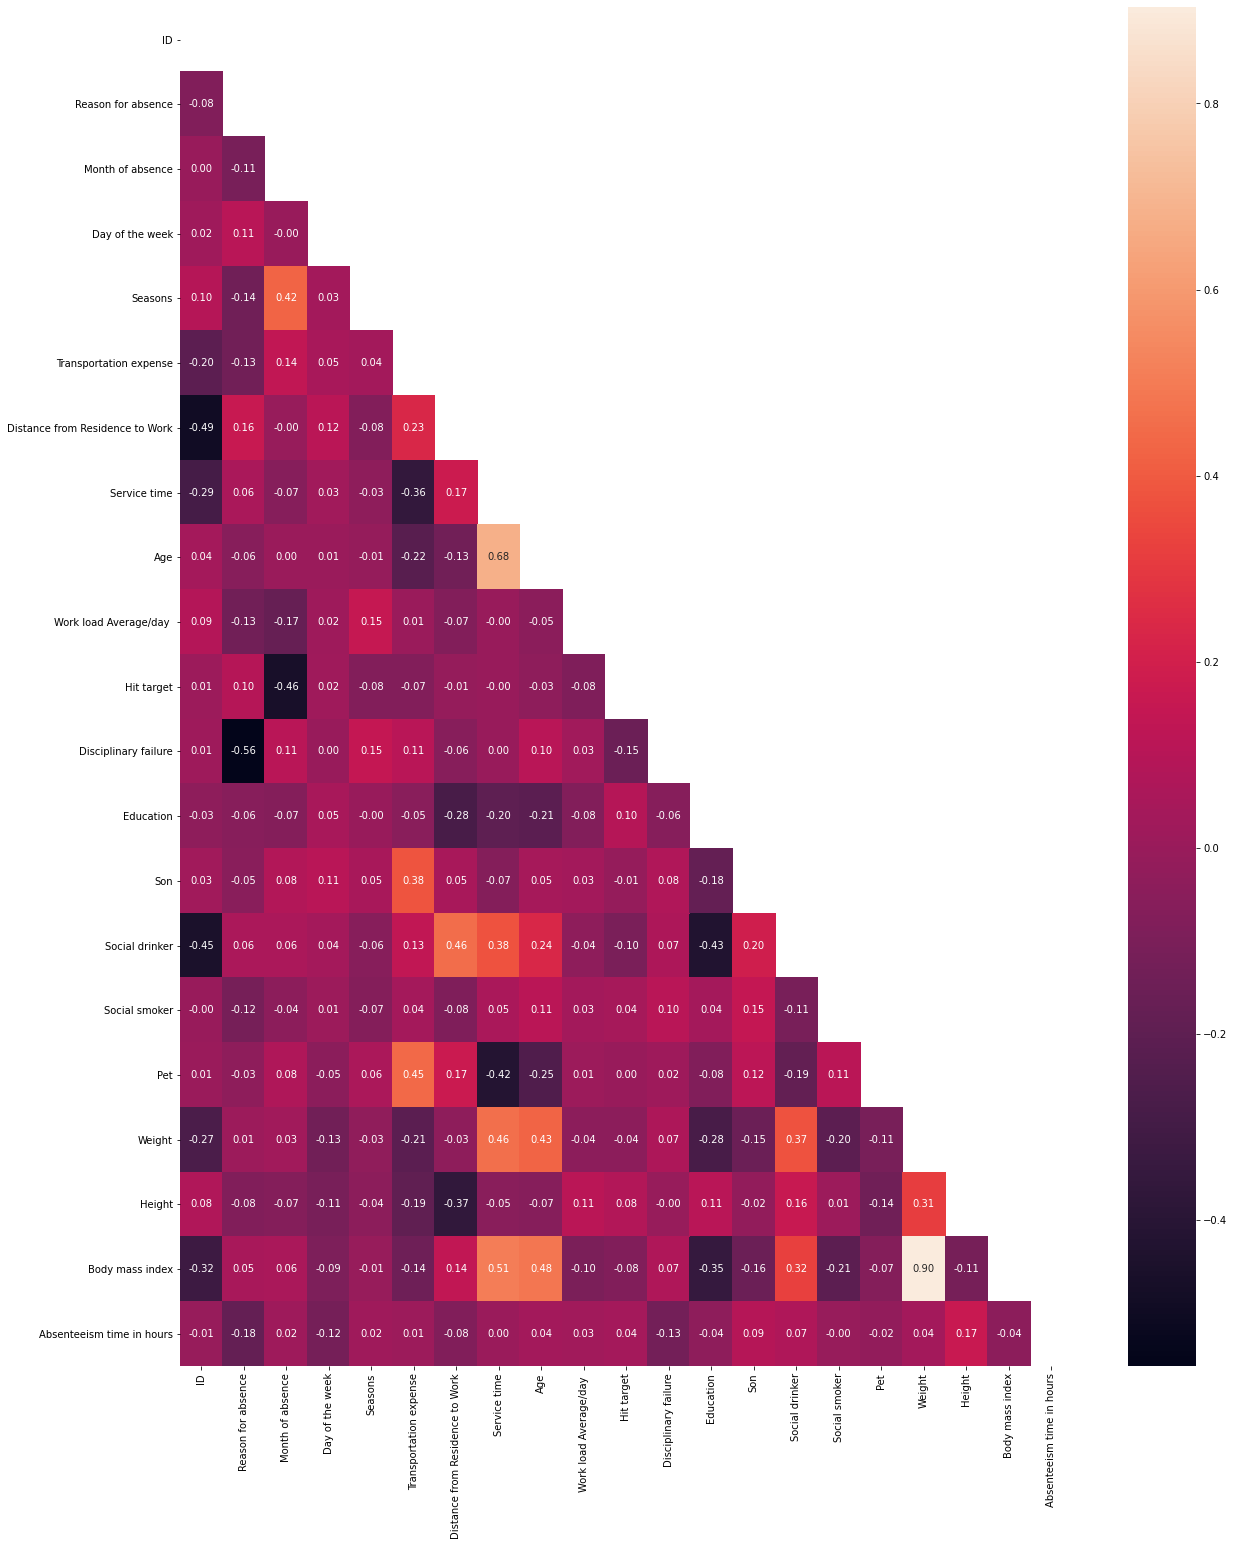

In [15]:

corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
 
# Heatmap
plt.figure(figsize=(20,25))
sns.heatmap(corr,  annot=True, fmt=".2f", mask = mask)
plt.show()


* Age is highly dependent on Service Time

### Check Target

In [16]:
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


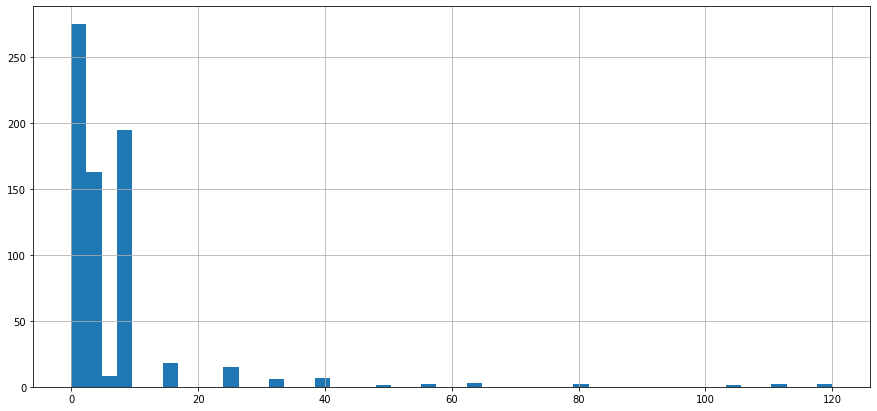

In [17]:
#plt.figure(figsize=(10,7))
#sns.distplot(df1["Absenteeism time in hours"])
df1["Absenteeism time in hours"].hist( bins = 50, figsize = (15,7))
plt.show()

From Statistical Analysis, 

mean = 6 hrs.
median = 3 hrs.

Outlier Analysis

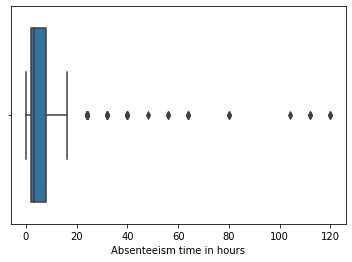

In [18]:
sns.boxplot(df1["Absenteeism time in hours"])
plt.show()

- It is clear that half of the employee is absent for less than 3 hrs.

- There are few employees which are absent for days which make mean 6 hrs.

### Check Features

Check **ID** column

In [19]:
df1.ID.unique()

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16])

In [20]:
len(df1.ID.unique())

34

* Hence, it is clear that there are total 36 employess from which information has been collected.

* Column 'ID' does not carry any information, so let's drop it.

In [21]:
df1 = df1.drop(['ID'], axis = 1)

In [22]:
df1.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


**Reason for Absence** Column

Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

In [23]:
df2 = df1.copy()

In [24]:
df2['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [25]:
len(df2['Reason for absence'].unique())

28

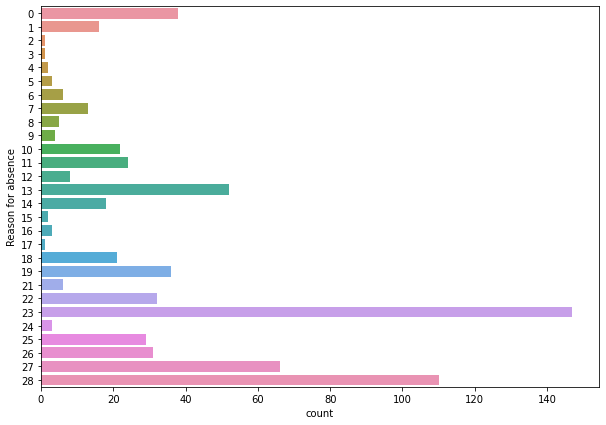

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(y="Reason for absence", data=df2)		# along y-axis # sort by count
plt.show()

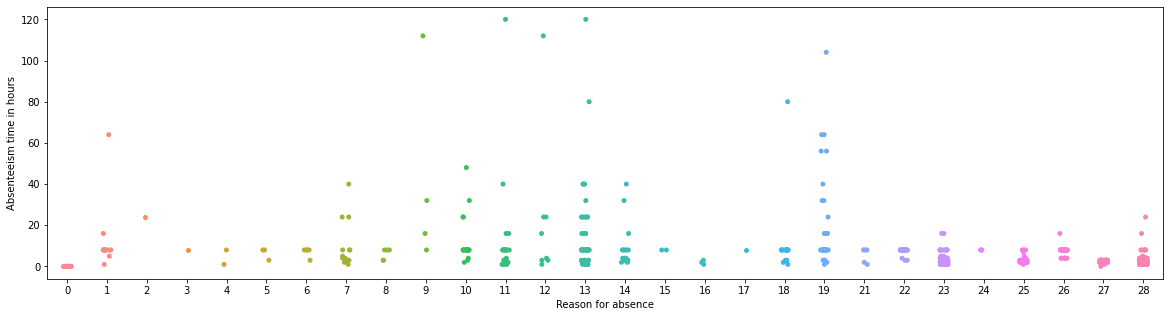

In [27]:
plt.figure(figsize=(20,5))
sns.stripplot(x="Reason for absence", y="Absenteeism time in hours",  data=df2)
plt.show()

- Group A

From Reason 1 to 14 are diseases related to behavior, ENT, muscles, joint,
nervous system etc. like various diseases. 

Has good count of employess but generally less than 25 except reason 13
Their absenteeiem time is also scattered in hours

let include in Reason A

---

- Group B

From Reason 15 to 17 are causes due to pregnancy and child bitth

Their count of employee as wellas absenteeiem time is low

Let include this in Reason B

---

- Group C

From Reason 18 to 21 are external factors but cause lot of damage to mind and body like accidents, poisoning etc.

Let include them in Reason C

---

-  Group D

From Reason 22 to 28 are light conditions which are following

patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27) an d dental consultation (28)

Have higher count of employees to get absent 
But their absenteeiem time is average 20 hrs.

These are in Reason D

So we have four reasons A, B, C and D

---

In [28]:
R = pd.get_dummies(df2['Reason for absence'])

In [29]:
R.shape, R.head()

((700, 28),
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
 1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
 2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
 3   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
 4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
 
    19  21  22  23  24  25  26  27  28  
 0   0   0   0   0   0   0   1   0   0  
 1   0   0   0   0   0   0   0   0   0  
 2   0   0   0   1   0   0   0   0   0  
 3   0   0   0   0   0   0   0   0   0  
 4   0   0   0   1   0   0   0   0   0  )

In [30]:
R = R.drop([0], axis = 1)

column 0 is unknown reason, drop this column to avoid **dummy trap**

In [31]:
R.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64')

In [32]:
RA = R[[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]].max(axis = 1)
RB = R[[15, 16, 17]].max(axis = 1)
RC = R[[18, 19, 21]].max(axis = 1)
RD = R[[22, 23, 24, 25, 26, 27, 28]].max(axis = 1)

In [33]:
RA.head()

0    0
1    0
2    0
3    1
4    0
dtype: uint8

In [34]:
df2 = pd.concat( [df2, RA.rename('Reason A'), RB.rename('Reason B'), RC.rename('Reason C'), RD.rename('Reason D')], axis =1 )

In [35]:
df2.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason A,Reason B,Reason C,Reason D
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


Drop 'Reason for absence' column to avoid **multi collinearity** with Reason A, B, C and D

In [36]:
df2.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason A', 'Reason B', 'Reason C',
       'Reason D'],
      dtype='object')

In [37]:
df2 = df2[['Reason A', 'Reason B', 'Reason C',
       'Reason D', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']]

In [38]:
df2.head()

,Reason A,Reason B,Reason C,Reason D,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Column **Education**

In [39]:
df3 = df2.copy()

In [40]:
df3['Education'].unique()

array([1, 3, 2, 4])

Education 
* high school (1), 
* graduate (2),
* postgraduate (3), and
* master and doctor (4)

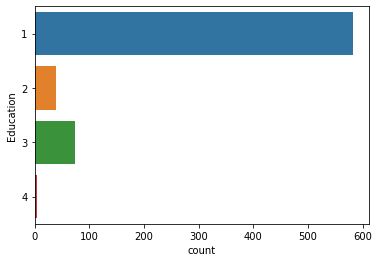

In [41]:
sns.countplot( y = df3['Education'])

Count of Employees with high School Education is too as compared to graduates

Let's change them into binary data

Education

* High School: 0
* Grduatuate and above: 1

In [42]:
df3['Education'] = df3['Education'].map({1:0, 2:1, 3:1, 4:1})

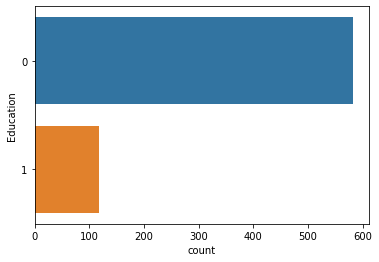

In [43]:
sns.countplot( y = df3['Education'])

In [44]:
df3.head()

,Reason A,Reason B,Reason C,Reason D,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,2


## Export pre_processed file

In [46]:
df3.to_csv('/content/drive/My Drive/Project/Absenteeism/Absenteeism_pre_processed.csv', index=False)